<a href="https://colab.research.google.com/github/codeunlimitd/machinelearningbasics/blob/master/BirthPrediction_all_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
############################################################
###         DATA SET CLEANING
###########################################################
url = 'https://raw.githubusercontent.com/codeunlimitd/machinelearningbasics/master/birthpredictiondata.csv'
initial_data = pd.read_csv(url)

In [ ]:
initial_data.head()

,pregnancy_reg_location_id,age_during_delivery,registered_with_no_of_child,registered_with_male_cnt,registered_with_female_cnt,prev_preg_diff_in_month,high_risk_mother,delivery_outcome,member_caste,is_bpl_family
0,508796,24,1,0,1,38,False,LBIRTH,626.0,False
1,16234,21,1,0,1,3,True,LBIRTH,626.0,False
2,16234,19,1,0,1,3,True,LBIRTH,626.0,False
3,334215,21,1,0,1,13,True,LBIRTH,627.0,False
4,488661,22,1,0,1,8,True,LBIRTH,625.0,True


In [ ]:


#Feature: delivery_outcome

# hard coding categorical variable
# 1 for LBIRTH
# 0 for ABORTION, MTP, SBIRTH, and SPONT_ABORTION
delivery_outcome_num = {'LBIRTH':1, 'ABORTION':0, 'MTP':0, 'SBIRTH':0, 'SPONT_ABORTION':0}
initial_data['delivery_outcome'] = initial_data['delivery_outcome'].map(delivery_outcome_num)
initial_data.head()

,pregnancy_reg_location_id,age_during_delivery,registered_with_no_of_child,registered_with_male_cnt,registered_with_female_cnt,prev_preg_diff_in_month,high_risk_mother,delivery_outcome,member_caste,is_bpl_family
0,508796,24,1,0,1,38,False,1,626.0,False
1,16234,21,1,0,1,3,True,1,626.0,False
2,16234,19,1,0,1,3,True,1,626.0,False
3,334215,21,1,0,1,13,True,1,627.0,False
4,488661,22,1,0,1,8,True,1,625.0,True


In [ ]:
X = initial_data[['pregnancy_reg_location_id', 'age_during_delivery', 'registered_with_no_of_child', 'registered_with_male_cnt', 'registered_with_female_cnt', 'prev_preg_diff_in_month', 'high_risk_mother']]

y = initial_data[['delivery_outcome']]

In [ ]:
#####################################################
##       MISSING VALUES
####################################################

In [ ]:
col_labels = ['pregnancy_reg_location_id', 'age_during_delivery', 'registered_with_no_of_child', 'registered_with_male_cnt', 'registered_with_female_cnt', 'prev_preg_diff_in_month', 'high_risk_mother', 'delivery_outcome', 'member_caste', 'is_bpl_family']

initial_data.columns = col_labels

In [ ]:
for c in col_labels:
    no_missing = initial_data[c].isnull().sum()
    if no_missing > 0:
        print(c)
        print(no_missing)
    else:
        print(c)
        print("No missing values")
        print(' ')

pregnancy_reg_location_id
No missing values
 
age_during_delivery
No missing values
 
registered_with_no_of_child
No missing values
 
registered_with_male_cnt
No missing values
 
registered_with_female_cnt
No missing values
 
prev_preg_diff_in_month
No missing values
 
high_risk_mother
No missing values
 
delivery_outcome
No missing values
 
member_caste
301
is_bpl_family
301


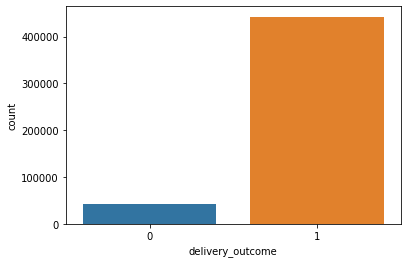

In [ ]:
########################################################
###   CLASS DISTRIBUTION
#######################################################

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(initial_data['delivery_outcome'],label="Sum")

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [ ]:
#Logistic Regression


LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [ ]:
#decision_tree

decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [ ]:
# Support Vector Machine
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()


In [ ]:
# Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [ ]:
# Quadratic Discriminant Analysis

QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [ ]:
# Random Forest Classifier
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [ ]:
# K-Nearest Neighbors
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [ ]:
# Naive Bayes
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [ ]:
# Comparison
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)
Model	Fitting time	Scoring time	Accuracy	Precision	Recall	F1_score	

SyntaxError: ignored

In [ ]:
#############################################

##  CORRELATION

############################################

correlation = initial_data.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [ ]:
X_corr = initial_data[['pregnancy_reg_location_id', 'age_during_delivery', 'registered_with_no_of_child', 'registered_with_male_cnt', 'registered_with_female_cnt', 'prev_preg_diff_in_month', 'high_risk_mother']]

y_corr = initial_data[['delivery_outcome']]

In [ ]:
correlation = X_corr.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)
